In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

In [6]:
df =pd.read_csv("deep_sea_corals1.csv")

<ipython-input-6-3cc60611e04d>:1: DtypeWarning: Columns (6,8,9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv("deep_sea_corals1.csv")


In [7]:
df

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,Locality,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID,Status
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,degrees_north,degrees_east,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endangered
1,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28,Endangered
2,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53,Healthy
3,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09,Healthy
4,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513368,513368,1705.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Mt Desert Rock a,2003-08-11,43.94792,-68.19433,...,Gulf of Maine; Mt Desert Rock a,100m,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-5,Healthy
513369,513369,1706.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Mt Desert Rock b,2003-08-11,43.93652,-68.20276,...,Gulf of Maine; Mt Desert Rock b,100m,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-6,Healthy
513370,513370,1716.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,No-name Canyon,1995-07-06,41.07333,-66.40183,...,No-name Canyon,100m,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-16,Healthy
513371,513371,1712.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,114 Bump a,2003-08-06,43.36468,-67.81245,...,Gulf of Maine; 114 Bump a,100m,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-10,Healthy


In [8]:
df['Status'].value_counts()

Status
Healthy       344094
Endangered    169279
Name: count, dtype: int64

In [9]:
missing_values_count = df.isnull().sum()
missing_values_count

Unnamed: 0                      0
CatalogNumber                   1
DataProvider                    1
ScientificName                  1
VernacularNameCategory        176
TaxonRank                       9
Station                    259783
ObservationDate                 6
latitude                        0
longitude                       0
DepthInMeters                   1
DepthMethod                 16528
Locality                   123728
LocationAccuracy            28711
SurveyID                   207145
Repository                  16789
IdentificationQualifier     24782
EventID                     41232
SamplingEquipment           27490
RecordType                  12296
SampleID                   111079
Status                          0
dtype: int64

In [10]:
missing_percentage = (missing_values_count / len(df)) * 100
missing_percentage

Unnamed: 0                  0.000000
CatalogNumber               0.000195
DataProvider                0.000195
ScientificName              0.000195
VernacularNameCategory      0.034283
TaxonRank                   0.001753
Station                    50.603168
ObservationDate             0.001169
latitude                    0.000000
longitude                   0.000000
DepthInMeters               0.000195
DepthMethod                 3.219491
Locality                   24.100995
LocationAccuracy            5.592620
SurveyID                   40.349804
Repository                  3.270332
IdentificationQualifier     4.827289
EventID                     8.031587
SamplingEquipment           5.354781
RecordType                  2.395140
SampleID                   21.637094
Status                      0.000000
dtype: float64

In [11]:
df['DateYear'] = df['ObservationDate'].str[:4]
df

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID,Status,DateYear
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,degrees_north,degrees_east,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endangered,NaN
1,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28,Endangered,2015
2,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53,Healthy,2015
3,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09,Healthy,2015
4,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50,Healthy,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513368,513368,1705.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Mt Desert Rock a,2003-08-11,43.94792,-68.19433,...,100m,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-5,Healthy,2003
513369,513369,1706.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Mt Desert Rock b,2003-08-11,43.93652,-68.20276,...,100m,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-6,Healthy,2003
513370,513370,1716.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,No-name Canyon,1995-07-06,41.07333,-66.40183,...,100m,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-16,Healthy,1995
513371,513371,1712.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,114 Bump a,2003-08-06,43.36468,-67.81245,...,100m,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-10,Healthy,2003


Escolhemos fazer primeiro essa filtragem e contagem para ainda ser utilizavel de alguma forma os dados que não estão completos a fim de entendermos o historico das populações

In [12]:
contagem_df = df.groupby(['DateYear', 'Locality']).size().reset_index(name='CountByDate')

# Unir a contagem de volta ao DataFrame original
df = pd.merge(df, contagem_df, on=['DateYear', 'Locality'])
df

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID,Status,DateYear,CountByDate
0,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28,Endangered,2015,856
1,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53,Healthy,2015,856
2,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09,Healthy,2015,856
3,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50,Healthy,2015,856
4,5,625384.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30902,-158.45425,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_04:24:44:48,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389635,513361,2243.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2527,1885-07-13,41.9833,-65.5917,...,NaN,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 12262,Healthy,1885,2
389636,513364,1773.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,347,1879-01-01,43.3,-60.4,...,Gloucester Fisheries,"National Museum of Natural History, Smithsonia...",NaN,NaN,NaN,specimen,USNM 4142,Endangered,1879,1
389637,513367,1707.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Georges Tower,1995-07-03,42.445,-67.09333,...,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-7,Healthy,1995,1
389638,513368,1705.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Mt Desert Rock a,2003-08-11,43.94792,-68.19433,...,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-5,Healthy,2003,1


In [13]:
df

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID,Status,DateYear,CountByDate
0,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28,Endangered,2015,856
1,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53,Healthy,2015,856
2,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09,Healthy,2015,856
3,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50,Healthy,2015,856
4,5,625384.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30902,-158.45425,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_04:24:44:48,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389635,513361,2243.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2527,1885-07-13,41.9833,-65.5917,...,NaN,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 12262,Healthy,1885,2
389636,513364,1773.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,347,1879-01-01,43.3,-60.4,...,Gloucester Fisheries,"National Museum of Natural History, Smithsonia...",NaN,NaN,NaN,specimen,USNM 4142,Endangered,1879,1
389637,513367,1707.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Georges Tower,1995-07-03,42.445,-67.09333,...,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-7,Healthy,1995,1
389638,513368,1705.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Mt Desert Rock a,2003-08-11,43.94792,-68.19433,...,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-5,Healthy,2003,1


In [14]:
df.nunique()

Unnamed: 0                 389640
CatalogNumber              389640
DataProvider                   58
ScientificName               2826
VernacularNameCategory         17
TaxonRank                      13
Station                     12250
ObservationDate              8971
latitude                   106800
longitude                  106025
DepthInMeters                3875
DepthMethod                     5
Locality                     6457
LocationAccuracy                6
SurveyID                     1377
Repository                     59
IdentificationQualifier        53
EventID                      4597
SamplingEquipment              19
RecordType                      8
SampleID                   203120
Status                          2
DateYear                      142
CountByDate                   403
dtype: int64

Aceitamos a diminuição de dados a partir da filtragem ocasionada pela grouby e criação de novas colunas visto que a base continua bem grande e diversa em suas amostra. Em seguida vamos checar novamente os dados faltantes

In [15]:
missing_values_count = df.isnull().sum()
missing_values_count

Unnamed: 0                      0
CatalogNumber                   0
DataProvider                    0
ScientificName                  0
VernacularNameCategory         57
TaxonRank                       8
Station                    148657
ObservationDate                 0
latitude                        0
longitude                       0
DepthInMeters                   0
DepthMethod                  4293
Locality                        0
LocationAccuracy            15671
SurveyID                   115109
Repository                   4597
IdentificationQualifier     11719
EventID                     26727
SamplingEquipment           14527
RecordType                    170
SampleID                    86578
Status                          0
DateYear                        0
CountByDate                     0
dtype: int64

In [16]:
missing_percentage = (missing_values_count / len(df)) * 100
missing_percentage

Unnamed: 0                  0.000000
CatalogNumber               0.000000
DataProvider                0.000000
ScientificName              0.000000
VernacularNameCategory      0.014629
TaxonRank                   0.002053
Station                    38.152397
ObservationDate             0.000000
latitude                    0.000000
longitude                   0.000000
DepthInMeters               0.000000
DepthMethod                 1.101786
Locality                    0.000000
LocationAccuracy            4.021918
SurveyID                   29.542398
Repository                  1.179807
IdentificationQualifier     3.007648
EventID                     6.859409
SamplingEquipment           3.728313
RecordType                  0.043630
SampleID                   22.219998
Status                      0.000000
DateYear                    0.000000
CountByDate                 0.000000
dtype: float64

In [17]:
rows_with_missing_A = df[df['Station'].isnull()]
rows_with_missing_A

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID,Status,DateYear,CountByDate
4775,74,57.0,United States Geological Survey,Madrepora oculata,stony coral (branching),species,NaN,2002,28.025,-89.727,...,NaN,NaN,NaN,NaN,submersible,literature,CoWCoG 57,Healthy,2002,1
4796,218141,248040.0,"Smithsonian Institution, National Museum of Na...",Chrysogorgia sp.,gorgonian coral,genus,NaN,1972-07-31,24.36533,-167.966,...,Sango Expedition Midway,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 1017274,Healthy,1972,5
4797,219325,247902.0,"Smithsonian Institution, National Museum of Na...",Calyptrophora wyvillei,gorgonian coral,species,NaN,1972-07-29,25.5,-168.65,...,Sango Expedition Midway,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 100763,Endangered,1972,5
4847,11401,619599.0,"Smithsonian Institution, National Museum of Na...",Fungiacyathus (Fungiacyathus) fragilis,stony coral (cup coral),species,NaN,1973-10-28,48.6342,-10.903,...,NaN,"National Museum of Natural History, Smithsonia...",morphological ID from sample by taxonomic expert,NaN,NaN,specimen,USNM 48336,Healthy,1973,13
4854,285692,634307.0,"Smithsonian Institution, National Museum of Na...",Desmophyllum dianthus,stony coral (cup coral),species,NaN,1973-10-23,47.742,-8.125,...,NaN,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 48473,Healthy,1973,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389625,513341,607444.0,Yale University Peabody Museum,Primnoa resedaeformis,gorgonian coral,species,NaN,1883-09-01,42.05,-65.8111,...,NaN,"Peabody Museum, Yale University",NaN,NaN,NaN,specimen,YPM IZ 008783.CN,Healthy,1883,2
389626,513339,9214.0,"NOAA, Northeast Fisheries Science Center",Primnoa resedaeformis,gorgonian coral,species,NaN,1955-12-13,42.05,-65.7,...,NaN,NEFSCBenthicDatabase,NaN,NaN,NaN,notation,55010700320209W05212030101,Endangered,1955,1
389631,513343,607445.0,Yale University Peabody Museum,Primnoa resedaeformis,gorgonian coral,species,NaN,1877-01-01,44.5333,-59.0,...,NaN,"Peabody Museum, Yale University",NaN,NaN,NaN,specimen,YPM IZ 010040.CN,Healthy,1877,1
389632,513345,607451.0,Yale University Peabody Museum,Primnoa resedaeformis,gorgonian coral,species,NaN,2002-10-07,42.1517,-65.68,...,Cruise 02-10,"Peabody Museum, Yale University",NaN,NaN,NaN,specimen,YPM IZ 045439,Healthy,2002,2


In [18]:
df['DateYear'].value_counts()

DateYear
2004    39971
2005    35326
2006    33690
2008    33465
2010    27359
        ...  
1919        1
1930        1
1916        1
1912        1
5/26        1
Name: count, Length: 142, dtype: int64

In [19]:
df_without_missing_station = df.dropna(subset=['Station'])
df_without_missing_station

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID,Status,DateYear,CountByDate
0,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28,Endangered,2015,856
1,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53,Healthy,2015,856
2,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09,Healthy,2015,856
3,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50,Healthy,2015,856
4,5,625384.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30902,-158.45425,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_04:24:44:48,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389635,513361,2243.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2527,1885-07-13,41.9833,-65.5917,...,NaN,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 12262,Healthy,1885,2
389636,513364,1773.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,347,1879-01-01,43.3,-60.4,...,Gloucester Fisheries,"National Museum of Natural History, Smithsonia...",NaN,NaN,NaN,specimen,USNM 4142,Endangered,1879,1
389637,513367,1707.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Georges Tower,1995-07-03,42.445,-67.09333,...,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-7,Healthy,1995,1
389638,513368,1705.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Mt Desert Rock a,2003-08-11,43.94792,-68.19433,...,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-5,Healthy,2003,1


In [20]:
df_filtered_date_year_month = df_without_missing_station[df_without_missing_station['DateYear'].str.len() >= 4]
df_filtered_date_year_month

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID,Status,DateYear,CountByDate
0,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28,Endangered,2015,856
1,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53,Healthy,2015,856
2,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09,Healthy,2015,856
3,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50,Healthy,2015,856
4,5,625384.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30902,-158.45425,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_04:24:44:48,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389635,513361,2243.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2527,1885-07-13,41.9833,-65.5917,...,NaN,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 12262,Healthy,1885,2
389636,513364,1773.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,347,1879-01-01,43.3,-60.4,...,Gloucester Fisheries,"National Museum of Natural History, Smithsonia...",NaN,NaN,NaN,specimen,USNM 4142,Endangered,1879,1
389637,513367,1707.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Georges Tower,1995-07-03,42.445,-67.09333,...,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-7,Healthy,1995,1
389638,513368,1705.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Mt Desert Rock a,2003-08-11,43.94792,-68.19433,...,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-5,Healthy,2003,1


In [21]:
missing_values_count = df_filtered_date_year_month.isnull().sum()
missing_values_count

Unnamed: 0                     0
CatalogNumber                  0
DataProvider                   0
ScientificName                 0
VernacularNameCategory        56
TaxonRank                      7
Station                        0
ObservationDate                0
latitude                       0
longitude                      0
DepthInMeters                  0
DepthMethod                  433
Locality                       0
LocationAccuracy           13134
SurveyID                   43916
Repository                  1601
IdentificationQualifier     6761
EventID                    19155
SamplingEquipment          10612
RecordType                    38
SampleID                   77524
Status                         0
DateYear                       0
CountByDate                    0
dtype: int64

In [22]:
df_filtered_date_year_month['LocationAccuracy'] = df_filtered_date_year_month['LocationAccuracy'].str.replace(r'\D', '', regex=True)

# Agora, todos os valores na coluna 'coluna_a' contêm apenas números como strings
# Para convertê-los em números, você pode usar o método to_numeric
df_filtered_date_year_month['LocationAccuracy'] = pd.to_numeric(df_filtered_date_year_month['LocationAccuracy'])


In [23]:
mediana_coluna_a = df_filtered_date_year_month['LocationAccuracy'].median()
df_filtered_date_year_month['LocationAccuracy'] = df_filtered_date_year_month['LocationAccuracy'].fillna(mediana_coluna_a)
df_filtered_date_year_month

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID,Status,DateYear,CountByDate
0,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28,Endangered,2015,856
1,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53,Healthy,2015,856
2,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09,Healthy,2015,856
3,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50,Healthy,2015,856
4,5,625384.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30902,-158.45425,...,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_04:24:44:48,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389635,513361,2243.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2527,1885-07-13,41.9833,-65.5917,...,NaN,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 12262,Healthy,1885,2
389636,513364,1773.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,347,1879-01-01,43.3,-60.4,...,Gloucester Fisheries,"National Museum of Natural History, Smithsonia...",NaN,NaN,NaN,specimen,USNM 4142,Endangered,1879,1
389637,513367,1707.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Georges Tower,1995-07-03,42.445,-67.09333,...,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-7,Healthy,1995,1
389638,513368,1705.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Mt Desert Rock a,2003-08-11,43.94792,-68.19433,...,GOM_coral_NURC,"National Undersea Research Center, University ...",NaN,NaN,ROV,video observation,GOM_coral_NURC-5,Healthy,2003,1


In [24]:
missing_values_count = df_filtered_date_year_month.isnull().sum()
missing_values_count

Unnamed: 0                     0
CatalogNumber                  0
DataProvider                   0
ScientificName                 0
VernacularNameCategory        56
TaxonRank                      7
Station                        0
ObservationDate                0
latitude                       0
longitude                      0
DepthInMeters                  0
DepthMethod                  433
Locality                       0
LocationAccuracy               0
SurveyID                   43916
Repository                  1601
IdentificationQualifier     6761
EventID                    19155
SamplingEquipment          10612
RecordType                    38
SampleID                   77524
Status                         0
DateYear                       0
CountByDate                    0
dtype: int64

Vamos tirar as seguintes colunas: EventID, SurveyID, SampleID pois são apenas IDs e não possuem real valor de signifacado para o problema

In [25]:
df_dropped = df_filtered_date_year_month.drop(columns=['SurveyID', 'SampleID', 'EventID'])
df_dropped

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,DepthMethod,Locality,LocationAccuracy,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Status,DateYear,CountByDate
0,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Endangered,2015,856
1,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
2,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
3,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
4,5,625384.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30902,-158.45425,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389635,513361,2243.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2527,1885-07-13,41.9833,-65.5917,...,reported,"Browns Bank, South Of",1000.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1885,2
389636,513364,1773.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,347,1879-01-01,43.3,-60.4,...,reported,Sable Island,1000.0,"National Museum of Natural History, Smithsonia...",NaN,NaN,specimen,Endangered,1879,1
389637,513367,1707.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Georges Tower,1995-07-03,42.445,-67.09333,...,averaged,Georges Tower,100.0,"National Undersea Research Center, University ...",NaN,ROV,video observation,Healthy,1995,1
389638,513368,1705.0,National Undersea Research Center,Primnoa resedaeformis,gorgonian coral,species,Mt Desert Rock a,2003-08-11,43.94792,-68.19433,...,reported,Gulf of Maine; Mt Desert Rock a,100.0,"National Undersea Research Center, University ...",NaN,ROV,video observation,Healthy,2003,1


In [26]:
df_dropped['SamplingEquipment'].value_counts()

SamplingEquipment
ROV               106255
submersible        63331
trawl              30259
towed camera       14505
longline            9476
AUV                 2535
dredge              2499
drop camera          552
net                  474
corer                211
grab                 161
multiple gears        62
SCUBA                 18
other                 15
hook and line          9
trap                   6
pot                    1
Jsl-I-3905             1
trawl-otter            1
Name: count, dtype: int64

In [27]:
teste = df_dropped[df_dropped['SamplingEquipment'].isnull()]
teste

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,DepthMethod,Locality,LocationAccuracy,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Status,DateYear,CountByDate
1072,27,635218.0,"Smithsonian Institution, National Museum of Na...",Madrepora oculata,stony coral (branching),species,19,1991-10-25,-5.2644,133.0,...,averaged,"Banda Sea, Kai Islands, Kai Besar Island, Har,...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Endangered,1991,12
1073,9027,637264.0,"Smithsonian Institution, National Museum of Na...",Trochocyathus (Trochocyathus) philippinensis,stony coral (cup coral),species,18,1991-10-24,-5.2969,133.014,...,averaged,"Banda Sea, Kai Islands, Kai Besar Island, Har,...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Endangered,1991,12
1074,10883,632860.0,"Smithsonian Institution, National Museum of Na...",Balanophyllia (Balanophyllia) desmophyllioides,stony coral (cup coral),species,18,1991-10-24,-5.2969,133.014,...,averaged,"Banda Sea, Kai Islands, Kai Besar Island, Har,...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1991,12
1075,12134,635200.0,"Smithsonian Institution, National Museum of Na...",Madracis sp.,stony coral (branching),genus,22,1991-10-25,-5.3592,133.006,...,averaged,"Banda Sea, Kai Islands, Kai Besar Island, Har,...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Endangered,1991,12
1076,12146,635204.0,"Smithsonian Institution, National Museum of Na...",Madrepora minutiseptum,stony coral (branching),species,18,1991-10-24,-5.2969,133.014,...,averaged,"Banda Sea, Kai Islands, Kai Besar Island, Har,...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1991,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389629,513349,2559.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2068,1883-09-01,42.05,-65.8111,...,reported,Between Georges and Brown Banks,1000.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1883,4
389630,513357,2597.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2069,1883-09-01,41.9139,-65.8097,...,reported,Between Georges and Brown Banks,1000.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1883,4
389634,513355,2207.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2523,1885-07-13,41.8083,-65.7417,...,reported,"Browns Bank, South Of",1000.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1885,2
389635,513361,2243.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2527,1885-07-13,41.9833,-65.5917,...,reported,"Browns Bank, South Of",1000.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1885,2


In [28]:
teste['RecordType'].value_counts()

RecordType
specimen       10586
literature        25
still image        1
Name: count, dtype: int64

In [29]:
valores_desejados = ['specimen', 'literature', 'still image']
df_filtrado = df_dropped.loc[df_dropped['RecordType'].isin(valores_desejados)]
df_filtrado

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,DepthMethod,Locality,LocationAccuracy,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Status,DateYear,CountByDate
1072,27,635218.0,"Smithsonian Institution, National Museum of Na...",Madrepora oculata,stony coral (branching),species,19,1991-10-25,-5.2644,133.0,...,averaged,"Banda Sea, Kai Islands, Kai Besar Island, Har,...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Endangered,1991,12
1073,9027,637264.0,"Smithsonian Institution, National Museum of Na...",Trochocyathus (Trochocyathus) philippinensis,stony coral (cup coral),species,18,1991-10-24,-5.2969,133.014,...,averaged,"Banda Sea, Kai Islands, Kai Besar Island, Har,...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Endangered,1991,12
1074,10883,632860.0,"Smithsonian Institution, National Museum of Na...",Balanophyllia (Balanophyllia) desmophyllioides,stony coral (cup coral),species,18,1991-10-24,-5.2969,133.014,...,averaged,"Banda Sea, Kai Islands, Kai Besar Island, Har,...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1991,12
1075,12134,635200.0,"Smithsonian Institution, National Museum of Na...",Madracis sp.,stony coral (branching),genus,22,1991-10-25,-5.3592,133.006,...,averaged,"Banda Sea, Kai Islands, Kai Besar Island, Har,...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Endangered,1991,12
1076,12146,635204.0,"Smithsonian Institution, National Museum of Na...",Madrepora minutiseptum,stony coral (branching),species,18,1991-10-24,-5.2969,133.014,...,averaged,"Banda Sea, Kai Islands, Kai Besar Island, Har,...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1991,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389629,513349,2559.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2068,1883-09-01,42.05,-65.8111,...,reported,Between Georges and Brown Banks,1000.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1883,4
389630,513357,2597.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2069,1883-09-01,41.9139,-65.8097,...,reported,Between Georges and Brown Banks,1000.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1883,4
389634,513355,2207.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2523,1885-07-13,41.8083,-65.7417,...,reported,"Browns Bank, South Of",1000.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1885,2
389635,513361,2243.0,"Smithsonian Institution, National Museum of Na...",Primnoa resedaeformis,gorgonian coral,species,2527,1885-07-13,41.9833,-65.5917,...,reported,"Browns Bank, South Of",1000.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,NaN,specimen,Healthy,1885,2


In [30]:
df_filtrado['SamplingEquipment'].value_counts()

SamplingEquipment
towed camera      14505
ROV               10416
longline           9476
trawl              6291
submersible        3063
dredge             2499
AUV                1552
drop camera         474
net                 474
corer               211
grab                161
multiple gears       62
SCUBA                18
other                15
hook and line         9
trap                  6
pot                   1
Jsl-I-3905            1
trawl-otter           1
Name: count, dtype: int64

Vamos remover tmb quando SamplingEquipment é vazio visto que é não há uma forma confiavel de se preencher esses dados

In [31]:
df_dropped = df_dropped.dropna(subset=['SamplingEquipment', 'DepthMethod', 'IdentificationQualifier', 'RecordType', 'VernacularNameCategory', 'Repository'])
df_dropped

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,DepthMethod,Locality,LocationAccuracy,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Status,DateYear,CountByDate
0,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Endangered,2015,856
1,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
2,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
3,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
4,5,625384.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30902,-158.45425,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388684,509674,247566.0,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5848,2002-10-30,33.7053,-119.1369,...,reported,"Channel Islands, Pilgrim Bank, North of Santa ...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388685,509730,247568.0,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5877,2002-11-05,33.95,-119.48,...,reported,"Channel Islands, West of Anacapa Island",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388686,509734,247567.0,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5850,2002-10-31,33.6722,-119.1861,...,reported,"Channel Islands, Kidney Bank, North of Santa B...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388687,509796,277510.0,"NOAA, Southwest Fisheries Science Center, Sant...",Antipathes dendrochristos,black coral,species,transect 2,2001-11-24,33.39083,-118.00013,...,averaged,Fourteen_Mile_Bank,1000.0,"NOAA, Southwest Fisheries Science Center",poor - ID from video,submersible,video observation,Endangered,2001,1


In [ ]:
df_dropped.iloc[44895]

In [32]:
missing_values_count = df_dropped.isnull().sum()
missing_values_count

Unnamed: 0                 0
CatalogNumber              0
DataProvider               0
ScientificName             0
VernacularNameCategory     0
TaxonRank                  0
Station                    0
ObservationDate            0
latitude                   0
longitude                  0
DepthInMeters              0
DepthMethod                0
Locality                   0
LocationAccuracy           0
Repository                 0
IdentificationQualifier    0
SamplingEquipment          0
RecordType                 0
Status                     0
DateYear                   0
CountByDate                0
dtype: int64

In [33]:
df_dropped.describe(include='object')

,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,DepthMethod,Locality,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Status,DateYear
count,224578,224578,224578,224578,224578,224578,224578.0000,224578.00000,224578,224578,224578,224578,224578,224578,224578,224578
unique,24,1646,17,13,8990,5052,53834.0000,51679.00000,4,2269,24,37,18,7,2,102
top,"NOAA, Alaska Fisheries Science Center",Porifera,gorgonian coral,species,14,2008-07-11,25.5743,-173.50637,reported,OLYMPIC COAST,"NOAA, Alaska Fisheries Science Center",ID by expert from video,ROV,video observation,Healthy,2008
freq,57621,34436,74366,75568,12981,12987,605.0000,605.00000,168026,22289,48150,63210,104441,155375,150541,32634


In [34]:
df_dropped.describe()

,Unnamed: 0,CatalogNumber,DepthInMeters,LocationAccuracy,CountByDate
count,224578.000000,224578.000000,224578.000000,224578.00000,224578.000000
mean,228799.538913,493390.892149,558.847069,414.94247,3888.238665
std,133664.148313,131128.374104,572.427581,432.62959,4740.462909
min,1.000000,35.000000,-999.000000,20.00000,1.000000
25%,123013.250000,440244.250000,185.000000,50.00000,458.000000
50%,242046.500000,513844.500000,382.000000,100.00000,1497.000000
75%,332522.500000,584742.750000,680.000000,1000.00000,6535.000000
max,513316.000000,739183.000000,6292.000000,1000.00000,16534.000000


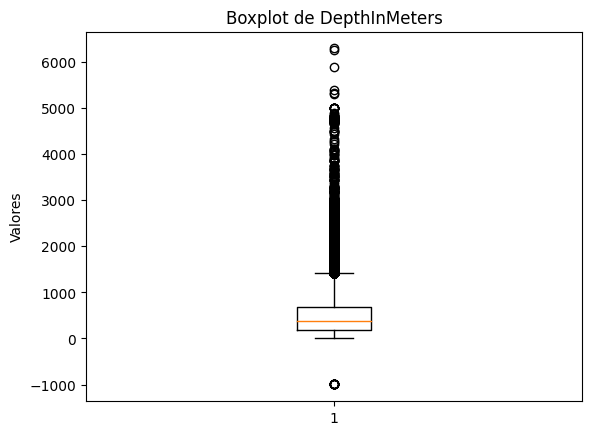

In [35]:
plt.boxplot(df_dropped['DepthInMeters'])

# Adicionar rótulo ao eixo y
plt.ylabel('Valores')

# Adicionar um título ao gráfico
plt.title('Boxplot de DepthInMeters')

# Mostrar o gráfico
plt.show()

Vamos considerar que os valores abaixo de 0 estavam mal calibrados e vamos corrigir para o valor absoluto

In [36]:
df_dropped['DepthInMeters'] = df_dropped['DepthInMeters'].abs()

<ipython-input-36-8422473e4226>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['DepthInMeters'] = df_dropped['DepthInMeters'].abs()


In [37]:
df_dropped.describe()

,Unnamed: 0,CatalogNumber,DepthInMeters,LocationAccuracy,CountByDate
count,224578.000000,224578.000000,224578.000000,224578.00000,224578.000000
mean,228799.538913,493390.892149,558.980519,414.94247,3888.238665
std,133664.148313,131128.374104,572.297266,432.62959,4740.462909
min,1.000000,35.000000,0.000000,20.00000,1.000000
25%,123013.250000,440244.250000,185.000000,50.00000,458.000000
50%,242046.500000,513844.500000,382.000000,100.00000,1497.000000
75%,332522.500000,584742.750000,680.000000,1000.00000,6535.000000
max,513316.000000,739183.000000,6292.000000,1000.00000,16534.000000


In [38]:
df_dropped.reset_index(drop=True)

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,DepthMethod,Locality,LocationAccuracy,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Status,DateYear,CountByDate
0,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Endangered,2015,856
1,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
2,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
3,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
4,5,625384.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30902,-158.45425,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224573,509674,247566.0,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5848,2002-10-30,33.7053,-119.1369,...,reported,"Channel Islands, Pilgrim Bank, North of Santa ...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
224574,509730,247568.0,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5877,2002-11-05,33.95,-119.48,...,reported,"Channel Islands, West of Anacapa Island",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
224575,509734,247567.0,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5850,2002-10-31,33.6722,-119.1861,...,reported,"Channel Islands, Kidney Bank, North of Santa B...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
224576,509796,277510.0,"NOAA, Southwest Fisheries Science Center, Sant...",Antipathes dendrochristos,black coral,species,transect 2,2001-11-24,33.39083,-118.00013,...,averaged,Fourteen_Mile_Bank,1000.0,"NOAA, Southwest Fisheries Science Center",poor - ID from video,submersible,video observation,Endangered,2001,1


Agora temos uma base sem dados faltantes, tratada e com dados confiaveis. Vamos seguir para a analise exploratoria

In [39]:
quantidades_por_ano = df_dropped.groupby(['DateYear', 'ScientificName']).size().reset_index(name='Quantidade')
quantidades_por_ano

,DateYear,ScientificName,Quantidade
0,1873,Caryophyllia (Caryophyllia) ambrosia ambrosia,1
1,1873,Deltocyathus italicus,1
2,1875,Abyssopathes lyra,1
3,1875,Bathypathes alternata,1
4,1875,Bathypathes patula,2
...,...,...,...
6241,2015,cf. Anthothelidae,2
6242,2015,cf. Kulamanamana haumeaae,2
6243,2015,cf. Paracalyptrophora sp.,1
6244,2015,cf. Pleurogorgia militaris,337


In [40]:
quantidades_por_ano.sort_values(by='Quantidade')

,DateYear,ScientificName,Quantidade
0,1873,Caryophyllia (Caryophyllia) ambrosia ambrosia,1
2471,1983,Isididae,1
2472,1983,Javania cailleti,1
2474,1983,Keroeides mosaica,1
2479,1983,Madracis cf. myriaster,1
...,...,...,...
5399,2008,Latrunculia sp.,5598
5403,2008,Lophelia pertusa,5650
5377,2008,Calcigorgia beringi,6237
5419,2008,Stylaster sp.,8114


In [41]:
quantidades_por_ano.sort_values(by='Quantidade', ascending=False)

,DateYear,ScientificName,Quantidade
5663,2010,Porifera,10270
5419,2008,Stylaster sp.,8114
5377,2008,Calcigorgia beringi,6237
5403,2008,Lophelia pertusa,5650
5399,2008,Latrunculia sp.,5598
...,...,...,...
4044,2001,Plumarella (Dicholaphis) aleutiana,1
4045,2001,Plumarella superba,1
1730,1971,Acanella eburnea,1
1729,1970,Trissopathes sp.,1


In [42]:
data_com_mais_registros = df_dropped['DateYear'].value_counts()
data_com_mais_registros

DateYear
2008    32634
2010    24820
2004    22682
2005    21199
2015    17349
        ...  
1916        1
1953        1
1939        1
1877        1
1894        1
Name: count, Length: 102, dtype: int64

In [43]:
df_dropped

,Unnamed: 0,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,...,DepthMethod,Locality,LocationAccuracy,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Status,DateYear,CountByDate
0,1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Endangered,2015,856
1,2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
2,3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
3,4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
4,5,625384.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30902,-158.45425,...,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388684,509674,247566.0,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5848,2002-10-30,33.7053,-119.1369,...,reported,"Channel Islands, Pilgrim Bank, North of Santa ...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388685,509730,247568.0,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5877,2002-11-05,33.95,-119.48,...,reported,"Channel Islands, West of Anacapa Island",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388686,509734,247567.0,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5850,2002-10-31,33.6722,-119.1861,...,reported,"Channel Islands, Kidney Bank, North of Santa B...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388687,509796,277510.0,"NOAA, Southwest Fisheries Science Center, Sant...",Antipathes dendrochristos,black coral,species,transect 2,2001-11-24,33.39083,-118.00013,...,averaged,Fourteen_Mile_Bank,1000.0,"NOAA, Southwest Fisheries Science Center",poor - ID from video,submersible,video observation,Endangered,2001,1


In [44]:
df_dropped['Status'].value_counts()

Status
Healthy       150541
Endangered     74037
Name: count, dtype: int64

In [45]:
(150496*100)/(150496+74026)

67.02951158461086

In [46]:
df['Status'].value_counts()

Status
Healthy       261031
Endangered    128609
Name: count, dtype: int64

In [47]:
(261031*100)/(128609+261031)

66.99286520891079

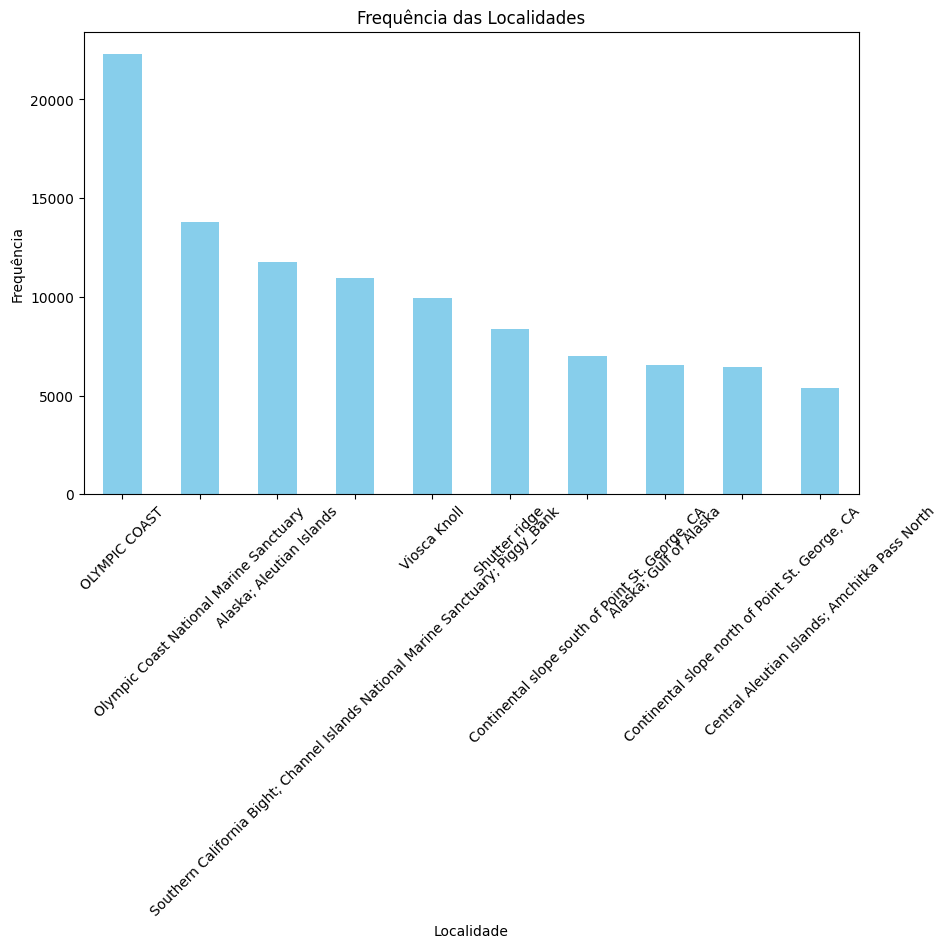

In [93]:
localidade_counts = df_dropped['Locality'].value_counts()
localidade_counts_u = localidade_counts.head(10)
plt.figure(figsize=(10, 6))
localidade_counts_u.plot(kind='bar', color='skyblue')
plt.title('Frequência das Localidades')
plt.xlabel('Localidade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

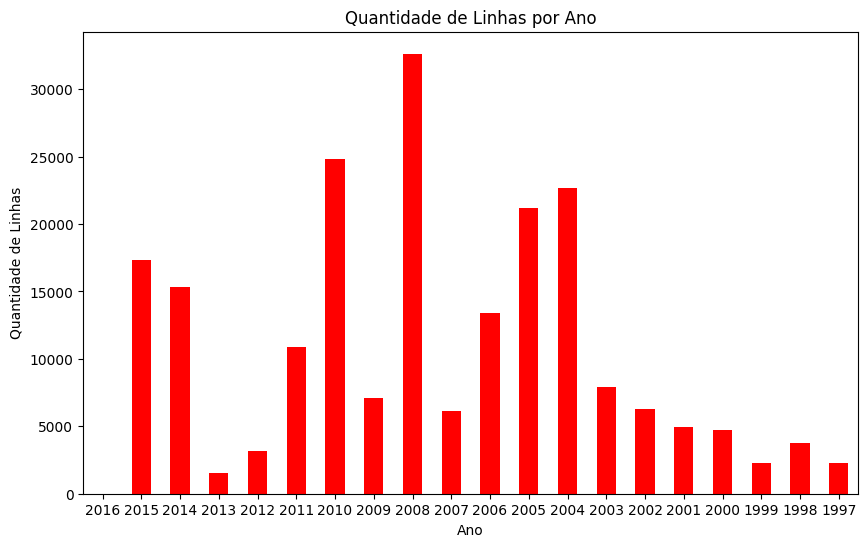

In [102]:
df_sorted = df_dropped['DateYear'].sort_values()

# Contar a frequência de cada ano
ano_counts = df_sorted.value_counts().sort_index(ascending=False)
ano_counts_u = ano_counts.head(20)
df_sorted = df_dropped['DateYear'].sort_values()
plt.figure(figsize=(10, 6))
ano_counts_u.plot(kind='bar', color='red')
plt.title('Quantidade de Linhas por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Linhas')
plt.xticks(rotation=0)
plt.show()

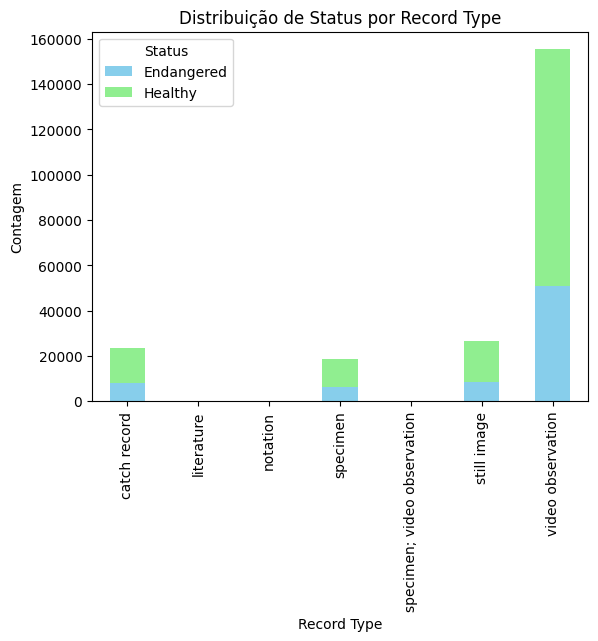

In [103]:
cross_table = pd.crosstab(df_dropped['RecordType'], df_dropped['Status'])

# Criando o gráfico de barras empilhadas
cross_table.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])

# Personalizando o gráfico
plt.title('Distribuição de Status por Record Type')
plt.xlabel('Record Type')
plt.ylabel('Contagem')
plt.legend(title='Status')

# Exibindo o gráfico
plt.show()

In [99]:
ano_counts

DateYear
1873        2
1875        4
1877        1
1880        8
1881       21
        ...  
2012     3175
2013     1548
2014    15317
2015    17349
2016        4
Name: count, Length: 102, dtype: int64

In [91]:
localidade_counts

Locality
OLYMPIC COAST                                                                       22289
Olympic Coast National Marine Sanctuary                                             13769
Alaska; Aleutian Islands                                                            11776
Southern California Bight; Channel Islands National Marine Sanctuary; Piggy_Bank    10961
Viosca Knoll                                                                         9951
                                                                                    ...  
South Georgia Island, SE                                                                1
Luzon Island, Verde Island Passage, Fortune Island, West of                             1
SW Ross Sea                                                                             1
South Shetland Islands, Nelson Strait, south of Nelson Island                           1
Aleutian Islands, Fox Islands, off Umnak Island                                         1
N

Vemos que depois do tratamento da base, a proporção entre amostras saudaveis e em risco se mantem muito proximas, portanto podemos ficar seguros que não estamos com dados enviesados.

Agora vamos dropar as ultimas colunas que possuem valor real para o modelo e portanto podem ser dropadas

In [48]:
df_semifinal = df_dropped.drop(columns=['Unnamed: 0', 'CatalogNumber', 'ObservationDate'])
df_semifinal

,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Status,DateYear,CountByDate
0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,18.30817,-158.45392,959.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Endangered,2015,856
1,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,18.30864,-158.45393,953.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
2,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,18.30877,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
3,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,18.30875,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
4,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,18.30902,-158.45425,968.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388684,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5848,33.7053,-119.1369,200.0,reported,"Channel Islands, Pilgrim Bank, North of Santa ...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388685,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5877,33.95,-119.48,110.0,reported,"Channel Islands, West of Anacapa Island",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388686,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5850,33.6722,-119.1861,200.0,reported,"Channel Islands, Kidney Bank, North of Santa B...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388687,"NOAA, Southwest Fisheries Science Center, Sant...",Antipathes dendrochristos,black coral,species,transect 2,33.39083,-118.00013,253.0,averaged,Fourteen_Mile_Bank,1000.0,"NOAA, Southwest Fisheries Science Center",poor - ID from video,submersible,video observation,Endangered,2001,1


In [49]:
total_datas = df_semifinal['DateYear'].unique()
len(total_datas)

102

In [50]:
df_semifinal['latitude'] = pd.to_numeric(df_semifinal['latitude'], errors='coerce')  # Convertendo coluna1 para numérico
df_semifinal['longitude'] = pd.to_numeric(df_semifinal['longitude'], errors='coerce')

In [51]:
df_semifinal

,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Status,DateYear,CountByDate
0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,18.30817,-158.45392,959.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Endangered,2015,856
1,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,18.30864,-158.45393,953.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
2,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,18.30877,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
3,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,18.30875,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
4,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,18.30902,-158.45425,968.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50.0,University of Hawaii,ID by expert from video,ROV,video observation,Healthy,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388684,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5848,33.70530,-119.13690,200.0,reported,"Channel Islands, Pilgrim Bank, North of Santa ...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388685,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5877,33.95000,-119.48000,110.0,reported,"Channel Islands, West of Anacapa Island",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388686,"Smithsonian Institution, National Museum of Na...",Antipathes dendrochristos,black coral,species,Dive 5850,33.67220,-119.18610,200.0,reported,"Channel Islands, Kidney Bank, North of Santa B...",100.0,"National Museum of Natural History, Smithsonia...",morphological ID by taxonomic expert,submersible,specimen,Healthy,2002,1
388687,"NOAA, Southwest Fisheries Science Center, Sant...",Antipathes dendrochristos,black coral,species,transect 2,33.39083,-118.00013,253.0,averaged,Fourteen_Mile_Bank,1000.0,"NOAA, Southwest Fisheries Science Center",poor - ID from video,submersible,video observation,Endangered,2001,1


In [52]:
df_semifinal.describe()

,latitude,longitude,DepthInMeters,LocationAccuracy,CountByDate
count,224578.000000,224578.000000,224578.000000,224578.00000,224578.000000
mean,37.014519,-126.780557,558.980519,414.94247,3888.238665
std,16.439125,62.496523,572.297266,432.62959,4740.462909
min,-78.491700,-179.993580,0.000000,20.00000,1.000000
25%,25.820200,-163.518242,185.000000,50.00000,458.000000
50%,34.217260,-125.370910,382.000000,100.00000,1497.000000
75%,51.376500,-119.481352,680.000000,1000.00000,6535.000000
max,67.816700,179.992600,6292.000000,1000.00000,16534.000000


In [53]:
value_counts_dict = {}

for column in df_semifinal.columns:
    value_counts_dict[column] = df_semifinal[column].unique()
value_counts_dict

{'DataProvider': array(['NOAA, Deep Sea Coral Research & Technology Program and Office of Ocean Exploration and Research',
        'Harbor Branch Oceanographic Institute',
        'Hawaii Undersea Research Laboratory',
        'Smithsonian Institution, National Museum of Natural History',
        'Texas A&M, Biodiversity Research and Teaching Collections',
        'Ross, Steve', 'Bureau of Ocean Energy Management',
        'Temple University', 'Thoma, Jana', 'Schmidt Ocean Institute',
        'Bishop Museum, Invertebrate Zoology Collection',
        'NOAA, Southwest Fisheries Science Center, Santa Cruz',
        'NOAA, Olympic Coast National Marine Sanctuary',
        'NOAA, Alaska Fisheries Science Center',
        'NOAA, Office of Ocean Exploration and Research',
        'Yale University Peabody Museum', 'California Academy of Sciences',
        'United States Geological Survey',
        'NOAA, Northwest Fisheries Science Center',
        'Ocean Biogeographic Information System, USA'

In [54]:
df_semifinal.columns

Index(['DataProvider', 'ScientificName', 'VernacularNameCategory', 'TaxonRank',
       'Station', 'latitude', 'longitude', 'DepthInMeters', 'DepthMethod',
       'Locality', 'LocationAccuracy', 'Repository', 'IdentificationQualifier',
       'SamplingEquipment', 'RecordType', 'Status', 'DateYear', 'CountByDate'],
      dtype='object')

Neste caso não podemos usar One-HotEncoder devido a Maldição da Dimensionalidade, portanto vamos usar o Frequency Encoder que lida melhor com dados categoricos com varios tipos

In [55]:
columns_to_encode = ['DataProvider', 'ScientificName', 'VernacularNameCategory','TaxonRank', 'Station', 'DepthMethod', 'Locality', 'Repository', 'IdentificationQualifier', 'SamplingEquipment', 'RecordType']



frequency_maps = {}
df_final = df_semifinal.copy()
for column in columns_to_encode:
    # Calculate the frequency of each category
    frequency_map = df_semifinal[column].value_counts(normalize=True)
    # Store the frequency mapping for each column
    frequency_maps[column] = frequency_map

# Apply frequency encoding to each column
for column, frequency_map in frequency_maps.items():
    df_final[column] = df_semifinal[column].map(frequency_map)







RecordType
video observation              0.691853
still image                    0.117923
catch record                   0.105620
specimen                       0.083770
notation                       0.000810
literature                     0.000018
specimen; video observation    0.000004
Name: proportion, dtype: float64

In [56]:
label_encoder = LabelEncoder()

# Fit label encoder and transform the column
encoded_column = label_encoder.fit_transform(df_final['Status'])

# Replace the original column with the encoded values
# For example, if 'data' is your DataFrame:
df_final['Status'] = encoded_column

In [57]:
df_final

,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,Repository,IdentificationQualifier,SamplingEquipment,RecordType,Status,DateYear,CountByDate
0,0.027456,0.001162,0.057071,0.336489,0.003803,18.30817,-158.45392,959.0,0.748185,0.003803,50.0,0.077029,0.281461,0.465054,0.691853,0,2015,856
1,0.027456,0.001162,0.057071,0.336489,0.003803,18.30864,-158.45393,953.0,0.748185,0.003803,50.0,0.077029,0.281461,0.465054,0.691853,1,2015,856
2,0.027456,0.001162,0.057071,0.336489,0.003803,18.30877,-158.45384,955.0,0.748185,0.003803,50.0,0.077029,0.281461,0.465054,0.691853,1,2015,856
3,0.027456,0.001162,0.057071,0.336489,0.003803,18.30875,-158.45384,955.0,0.748185,0.003803,50.0,0.077029,0.281461,0.465054,0.691853,1,2015,856
4,0.027456,0.001162,0.057071,0.336489,0.003803,18.30902,-158.45425,968.0,0.748185,0.003803,50.0,0.077029,0.281461,0.465054,0.691853,1,2015,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388684,0.034696,0.003072,0.062401,0.336489,0.000004,33.70530,-119.13690,200.0,0.748185,0.000004,100.0,0.034723,0.025145,0.280152,0.083770,1,2002,1
388685,0.034696,0.003072,0.062401,0.336489,0.000004,33.95000,-119.48000,110.0,0.748185,0.000004,100.0,0.034723,0.025145,0.280152,0.083770,1,2002,1
388686,0.034696,0.003072,0.062401,0.336489,0.000004,33.67220,-119.18610,200.0,0.748185,0.000004,100.0,0.034723,0.025145,0.280152,0.083770,1,2002,1
388687,0.194022,0.003072,0.062401,0.336489,0.021302,33.39083,-118.00013,253.0,0.242539,0.000004,1000.0,0.124465,0.000899,0.280152,0.691853,0,2001,1


In [58]:
df_final.columns

Index(['DataProvider', 'ScientificName', 'VernacularNameCategory', 'TaxonRank',
       'Station', 'latitude', 'longitude', 'DepthInMeters', 'DepthMethod',
       'Locality', 'LocationAccuracy', 'Repository', 'IdentificationQualifier',
       'SamplingEquipment', 'RecordType', 'Status', 'DateYear', 'CountByDate'],
      dtype='object')

In [73]:
df.columns

Index(['Unnamed: 0', 'CatalogNumber', 'DataProvider', 'ScientificName',
       'VernacularNameCategory', 'TaxonRank', 'Station', 'ObservationDate',
       'latitude', 'longitude', 'DepthInMeters', 'DepthMethod', 'Locality',
       'LocationAccuracy', 'SurveyID', 'Repository', 'IdentificationQualifier',
       'EventID', 'SamplingEquipment', 'RecordType', 'SampleID', 'Status',
       'DateYear', 'CountByDate'],
      dtype='object')

In [59]:
X = df_final.drop(columns=['Status'])
y = df_final['Status']

# Split the data into train and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(X_train)

In [61]:
normalized_train_X

array([[1.77830402e-05, 5.29710973e-06, 1.18616339e-04, ...,
        2.47828493e-04, 7.21792482e-01, 4.19463522e-01],
       [6.69834562e-05, 5.15242676e-08, 2.44587607e-05, ...,
        2.96503077e-04, 8.58412874e-01, 1.52140075e-01],
       [5.71565109e-05, 3.50094010e-07, 1.21093447e-04, ...,
        2.53003985e-04, 7.32843343e-01, 5.47438365e-01],
       ...,
       [8.70868791e-05, 8.22187435e-07, 4.26509732e-05, ...,
        3.58497904e-05, 6.82915739e-01, 6.40488072e-01],
       [9.01940056e-05, 4.38283292e-08, 2.59166302e-05, ...,
        3.71288560e-05, 7.06578065e-01, 6.06391623e-01],
       [1.54661795e-05, 1.98487930e-09, 5.60132940e-05, ...,
        3.73415344e-05, 8.61654514e-01, 2.22880112e-03]])

In [62]:
normalized_test_X = normalizer.transform(X_test)
normalized_test_X

array([[1.55865534e-05, 1.60026216e-08, 3.45656626e-05, ...,
        3.76321649e-05, 8.82286920e-01, 1.39261174e-02],
       [9.34483457e-05, 7.38527811e-05, 7.38527811e-05, ...,
        3.33223251e-04, 9.60387545e-01, 3.37147082e-02],
       [1.11072052e-04, 1.89678935e-06, 2.70138272e-05, ...,
        4.57234180e-05, 8.65374329e-01, 3.11690604e-02],
       ...,
       [4.43702436e-05, 3.76932616e-06, 1.27494858e-05, ...,
        1.19644342e-04, 3.46558016e-01, 9.28996838e-01],
       [1.11285152e-04, 6.65072718e-05, 6.65072718e-05, ...,
        3.63341069e-05, 8.68335820e-01, 1.59614177e-01],
       [6.41036595e-05, 4.83046578e-06, 4.84324963e-06, ...,
        2.83755622e-04, 8.21917563e-01, 3.52308976e-01]])

Vamos treinar com um Naive Bayes e arvore de decisão, visto que ele lida bem com dados que sofreram Frequency Encoding e ele é relativamente rapido e simples

In [63]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
nb_classifier = GaussianNB()


In [64]:
# Train the model
nb_classifier.fit(normalized_train_X, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(normalized_test_X)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14746
           1       0.67      1.00      0.80     30170

    accuracy                           0.67     44916
   macro avg       0.34      0.50      0.40     44916
weighted avg       0.45      0.67      0.54     44916



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(normalized_train_X, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(normalized_test_X)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.24      0.28     14746
           1       0.67      0.76      0.72     30170

    accuracy                           0.59     44916
   macro avg       0.50      0.50      0.50     44916
weighted avg       0.56      0.59      0.57     44916



Vamos aplicar um Random_Search para tentar melhorar nosso modelo de arvore de decisão

In [67]:

# Define os hiperparâmetros que você deseja otimizar
param_dist = {
    'max_depth': [3, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

# Inicializa a busca aleatória com validação cruzada
random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Realiza a busca aleatória nos dados de treinamento
random_search.fit(normalized_train_X, y_train)

# Mostra os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(random_search.best_params_)

# Avalia o desempenho do modelo com os melhores hiperparâmetros no conjunto de teste
y_pred = random_search.predict(normalized_test_X)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)


Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 13}
Acurácia: 0.6717205450173658


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.00      0.00     14746
           1       0.67      1.00      0.80     30170

    accuracy                           0.67     44916
   macro avg       0.67      0.50      0.40     44916
weighted avg       0.67      0.67      0.54     44916



In [86]:
import numpy as np
first_zero_index = np.where(y_test == 0)[0]
first_zero_index

array([    0,     2,     7, ..., 44895, 44897, 44915])

In [69]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "iris_classifier_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(dt_classifier, file)

In [74]:
with open('normalizer.pkl', 'wb') as f:
    pickle.dump(normalizer, f)
with open('encoder.pkl', 'wb') as f:
    pickle.dump(frequency_maps, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [71]:
import sklearn
print(sklearn.__version__)

1.2.2
